In [191]:
import matplotlib.pyplot as plt
from pandas import DataFrame

import sklearn.cluster as skl_cluster
import sklearn.datasets.samples_generator as skl_smpl
from sklearn.datasets import make_circles

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

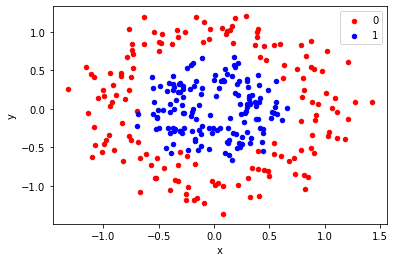

In [208]:

X, y = make_circles(n_samples=300, noise=0.15, factor=0.4)

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
grouped = df.groupby('label')

fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [209]:
# splitting data into training and test set
train_set = df.head(125)
test_set = df.tail(125)
"""
#CHECK the training set had data from both classes?
grouped = test_set.groupby('label')
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
"""

# target column ("label") for training set and test set
train_labels = train_set.pop("label")
test_labels = test_set.pop("label")

In [212]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(train_set, train_labels )
print(f'DT Model Score on test set: {dt_model.score(test_set , test_labels)}')
print(f'DT Model Score on training set: {dt_model.score(train_set , train_labels)}')

DT Model Score on test set: 0.952
DT Model Score on training set: 1.0


In [213]:

rf_cl = RandomForestClassifier(n_estimators = 20)
rf_cl = rf_cl.fit(train_set, train_labels)

test_pred = rf_cl.predict(test_set)
print(f'Random Forest Classifier model score on test set: {rf_cl.score(test_set , test_labels)}')

Random Forest Classifier model score on test set: 0.96


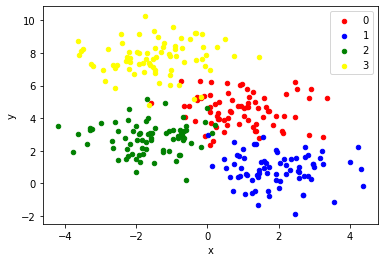

In [214]:
data, cluster_ids = skl_smpl.make_blobs(n_samples=300, cluster_std=1, centers=4, random_state=0)
df2 = DataFrame(dict(x=data[:,0], y=data[:,1], label=cluster_ids))
"""
Kmean = skl_cluster.KMeans(n_clusters=4)
Kmean.fit(data)
clusters = Kmean.predict(data)
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')
"""

fig, ax = plt.subplots()
grouped2 = df2.groupby('label')
colors = {0:'red', 1:'blue',2:'green', 3:'yellow'}
for key, group in grouped2:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [215]:
# splitting data into training and test set
train_set2 = df2.head(125)
test_set2 = df2.tail(125)

# target column ("label") for training set and test set
train_labels2 = train_set2.pop("label")
test_labels2 = test_set2.pop("label")

In [216]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(train_set2, train_labels2 )
print(f'DT Model Score on test set: {dt_model.score(test_set2 , test_labels2)}')
print(f'DT Model Score on training set: {dt_model.score(train_set2 , train_labels2)}')

DT Model Score on test set: 0.904
DT Model Score on training set: 1.0


In [219]:

rf_cl = RandomForestClassifier(n_estimators = 20)
rf_cl = rf_cl.fit(train_set2, train_labels2)

test_pred = rf_cl.predict(test_set2)
print(f'Random Forest Classifier model score on test set: {rf_cl.score(test_set2 , test_labels2)}')

Random Forest Classifier model score on test set: 0.928
